In [65]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [66]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# 1. Classification

In [67]:
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [68]:
X.shape

(500, 2)

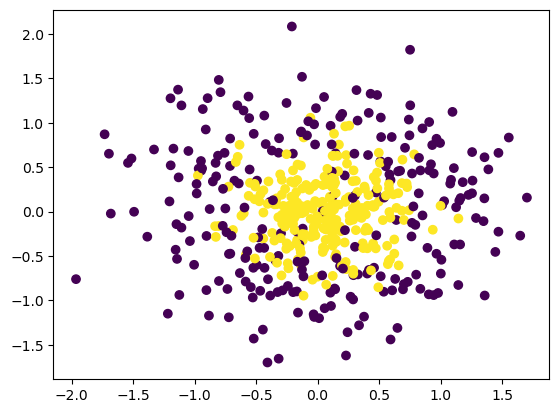

In [69]:
plt.scatter(X[:,0],X[:,1],c=y)

### 1. Decision Tree

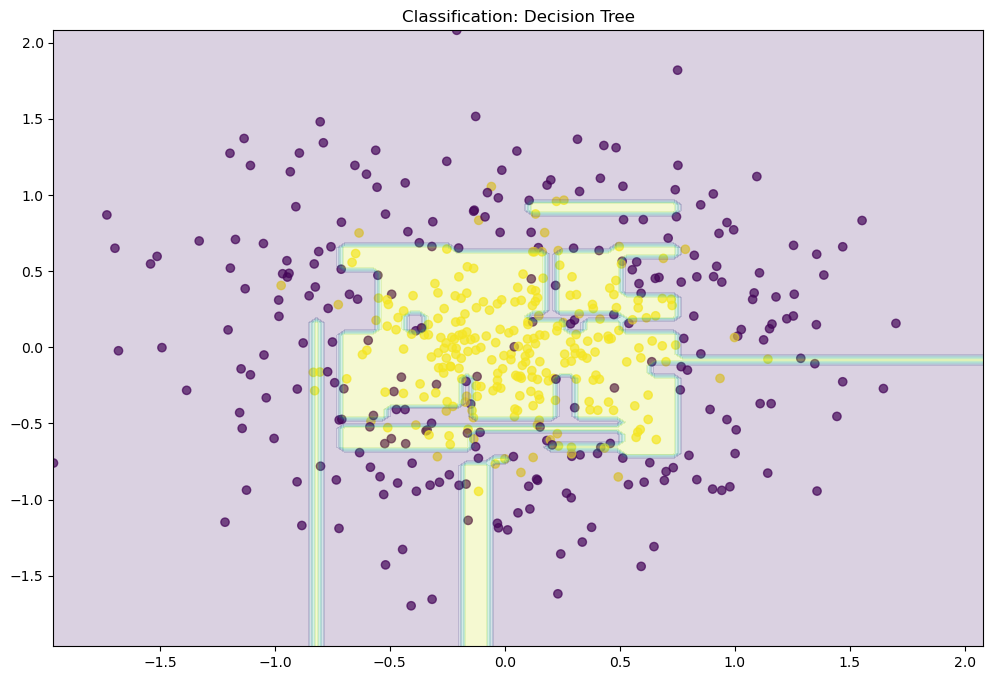

In [70]:
dt_cls = DecisionTreeClassifier(random_state=42)
dt_cls.fit(X_train,y_train)

plt.figure(figsize=(12, 8))
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)

x_range = np.linspace(X.min(),X.max(),100)
xx1, xx2 = np.meshgrid(x_range, x_range)

y_pred = dt_cls.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
plt.contourf(xx1, xx2, y_pred, alpha=0.2)
plt.title("Classification: Decision Tree")
plt.show()

### 2. Random forrest

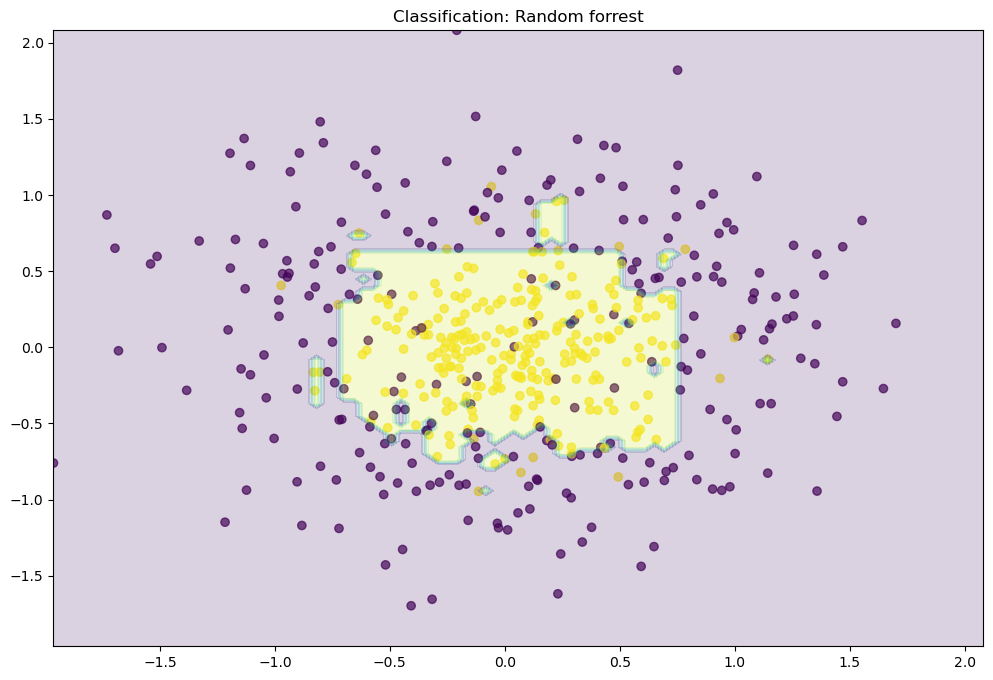

In [71]:
rf_cls = RandomForestClassifier(n_estimators=500,random_state=42)
rf_cls.fit(X_train,y_train)

plt.figure(figsize=(12, 8))
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)

x_range = np.linspace(X.min(),X.max(),100)
xx1, xx2 = np.meshgrid(x_range, x_range)

y_pred = rf_cls.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
plt.contourf(xx1, xx2, y_pred, alpha=0.2)
plt.title("Classification: Random forrest")
plt.show()

# 2. Regression

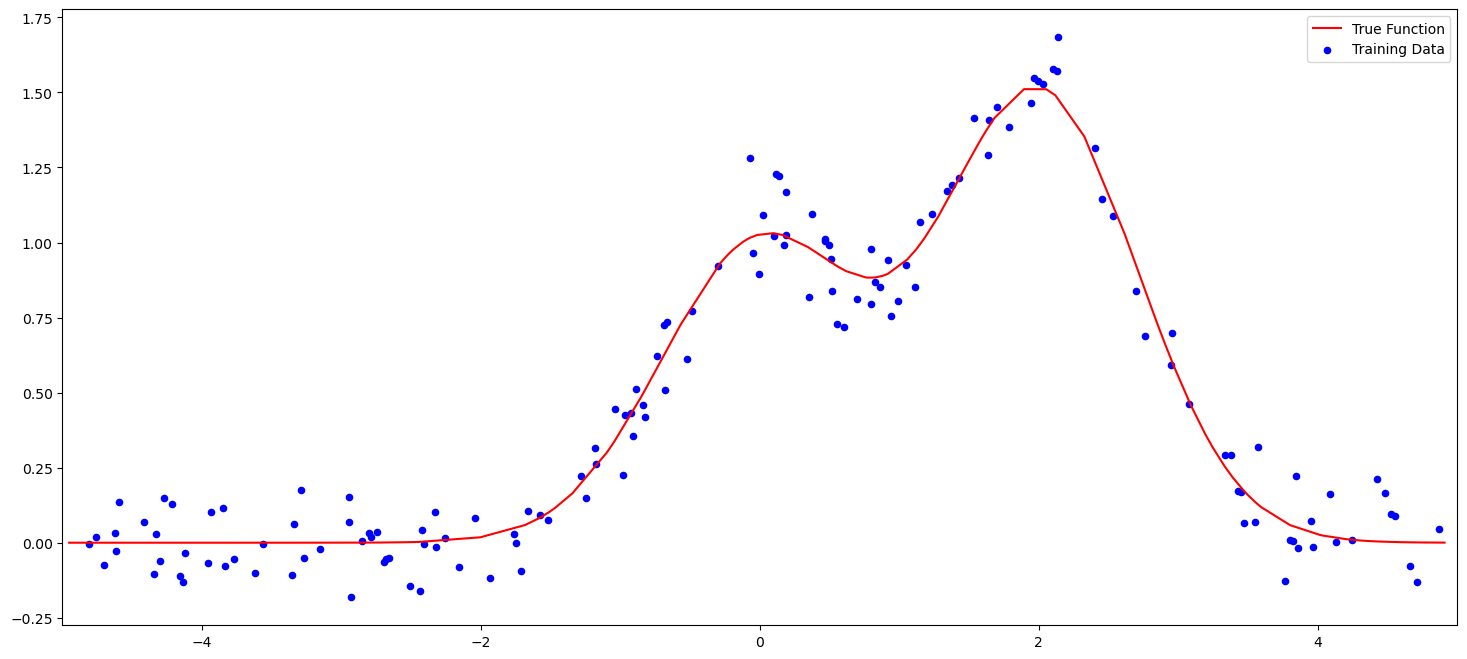

In [72]:
# Generate training data
X_train = np.sort(np.random.rand(150) * 10 - 5)
y_train = np.exp(-X_train ** 2) + 1.5 * np.exp(-(X_train - 2) ** 2) + np.random.normal(0.0, 0.1, 150)

# Generate testing data
X_test = np.sort(np.random.rand(100) * 10 - 5)
y_test = np.exp(-X_test ** 2) + 1.5 * np.exp(-(X_test - 2) ** 2) + np.random.normal(0.0, 0.1, 100)

# Define the true function
f = lambda x: np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

# Plot
plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r", label="True Function")
plt.scatter(X_train, y_train, c="b", s=20, label="Training Data")
plt.xlim([-5, 5])
plt.legend()
plt.show()


### 1. Decision Tree

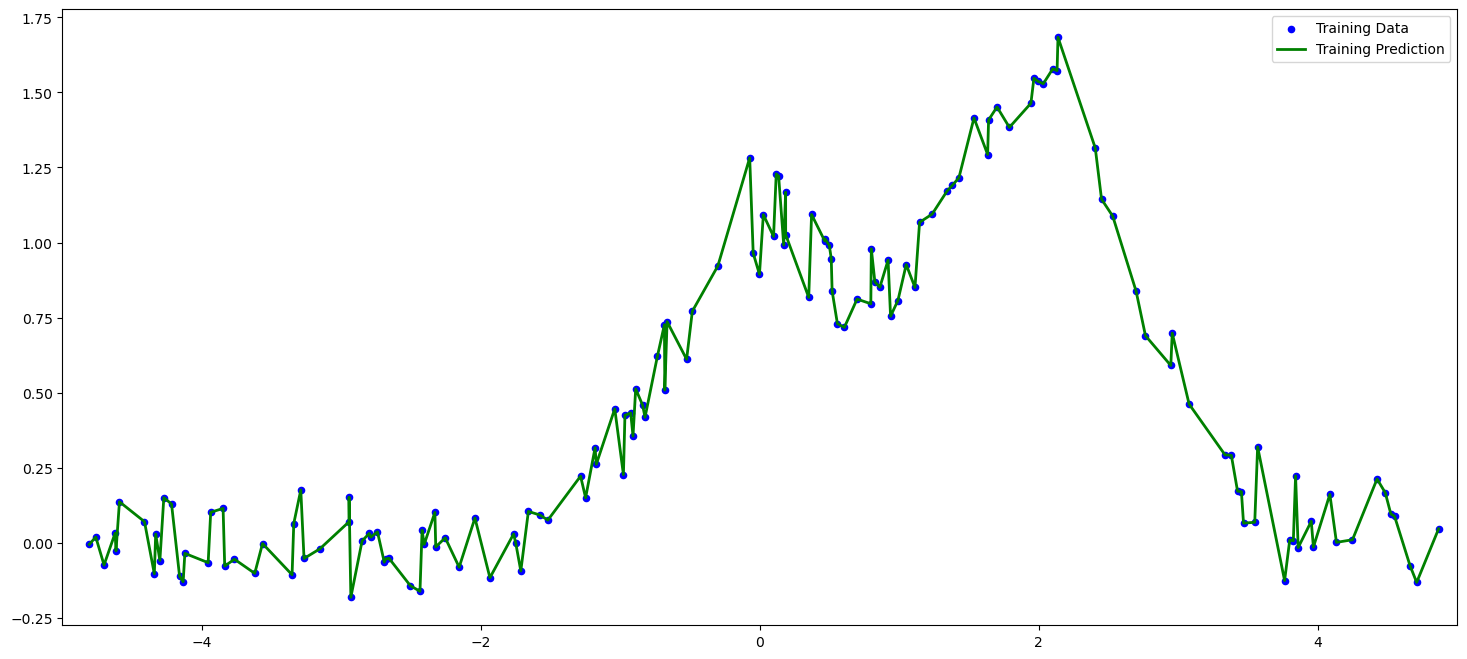

In [73]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train.reshape(-1, 1), y_train)  # Reshape X_train to 2D for the model


plt.figure(figsize=(18, 8))
plt.scatter(X_train, y_train, c="b", s=20, label="Training Data")
plt.plot(X_train, dt_reg.predict(X_train.reshape(-1, 1)), "g", lw=2, label="Training Prediction")  # Reshape for prediction
plt.xlim([-5, 5])
plt.legend()
plt.show()

# 2. Random Forest 

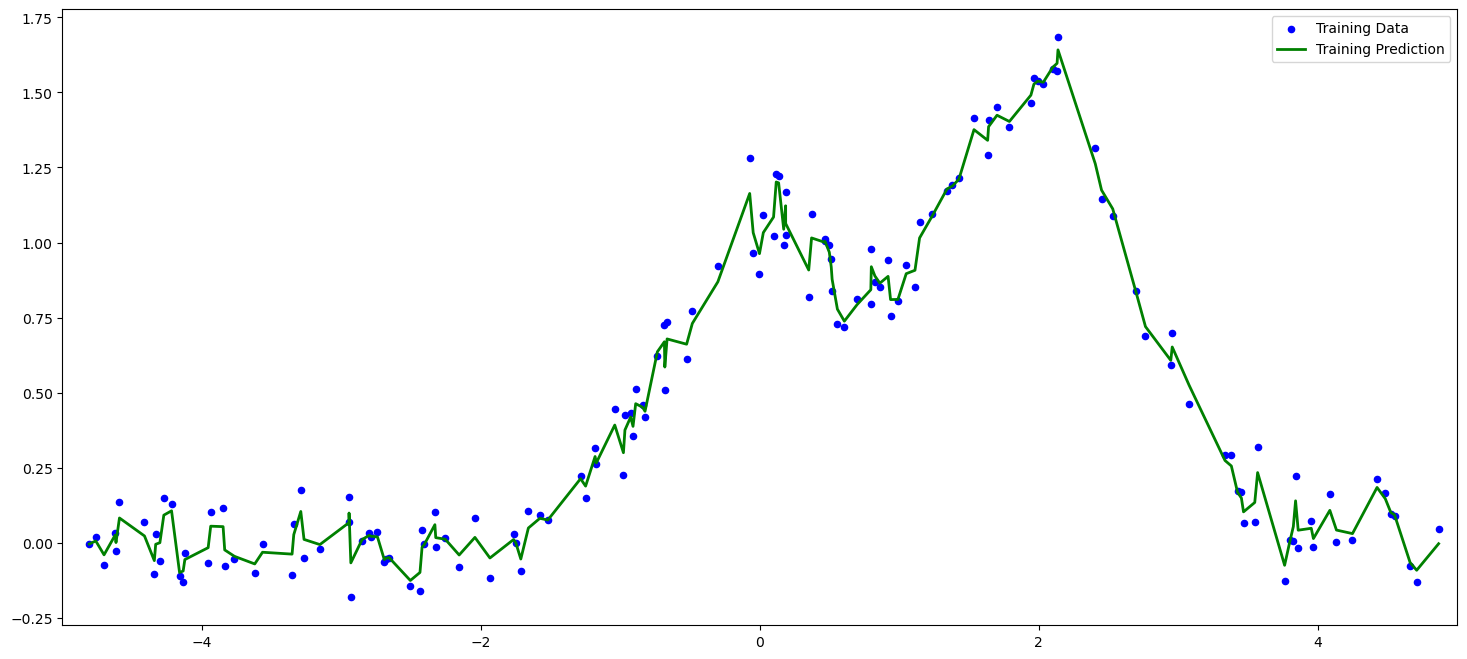

In [74]:
rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train.reshape(-1, 1), y_train)  # Reshape X_train to 2D for the model


plt.figure(figsize=(18, 8))
plt.scatter(X_train, y_train, c="b", s=20, label="Training Data")
plt.plot(X_train, rf_reg.predict(X_train.reshape(-1, 1)), "g", lw=2, label="Training Prediction")  # Reshape for prediction
plt.xlim([-5, 5])
plt.legend()
plt.show()